In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [75]:
X,y[:10]

X[1], y[1]

(array([-0.75615888,  0.15325888]), 1)

In [3]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


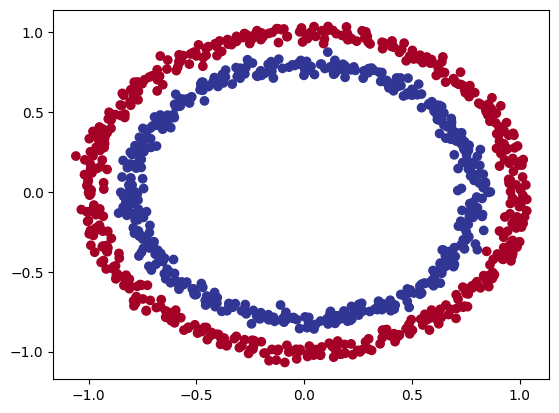

In [8]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [11]:
## Steps in Modelling
import tensorflow as tf

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["accuracy"])

model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 998us/step - loss: 6.2502 - accuracy: 0.4840
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 5.4414 - accuracy: 0.4350
Epoch 3/5
32/32 [==============================] - 0s 836us/step - loss: 5.3384 - accuracy: 0.4640
Epoch 4/5
32/32 [==============================] - 0s 764us/step - loss: 5.8347 - accuracy: 0.4900
Epoch 5/5
32/32 [==============================] - 0s 742us/step - loss: 6.6024 - accuracy: 0.4940


In [12]:
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 677us/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

In [14]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["accuracy"])

model_2.fit(X, y, epochs=100, verbose=0)

model_2.evaluate(X, y)

32/32 [==============================] - 0s 710us/step - loss: 0.6939 - accuracy: 0.5000


[0.693890392780304, 0.5]

In [15]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)

])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

model_3.fit(X, y, epochs=100, verbose=0)

model_3.evaluate(X, y)

32/32 [==============================] - 0s 742us/step - loss: 0.7017 - accuracy: 0.5070


[0.7016528844833374, 0.5070000290870667]

In [20]:
## To visualize the predictions, let's create func 'plot_decision_boundary()'

import numpy as np

def plot_decision_boundary(model, X, y):
    
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max()+0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max()+0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
    
    x_in = np.c_[xx.ravel(), yy.ravel()]
    
    y_pred = model.predict(x_in)
    
    if len(y_pred[0]) > 1:
        print("doing multiclass classification")
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
    
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
        

313/313 [==============================] - 0s 538us/step
doing binary classification


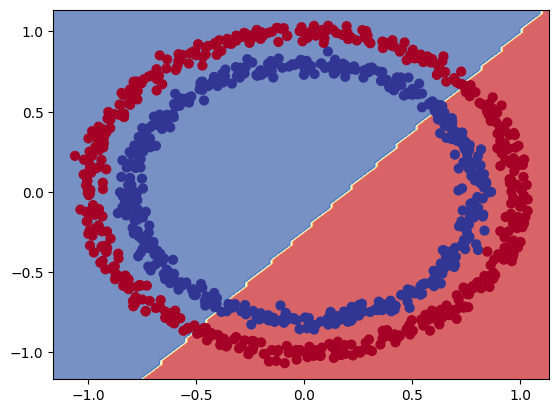

In [21]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [34]:
tf.random.set_seed(42)

X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]


tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["mae"])

model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 394.4308 - mae: 394.4308
Epoch 2/100
5/5 [==============================] - 0s 1ms/step - loss: 261.3740 - mae: 261.3740
Epoch 3/100
5/5 [==============================] - 0s 1ms/step - loss: 132.0507 - mae: 132.0507
Epoch 4/100
5/5 [==============================] - 0s 1ms/step - loss: 51.0655 - mae: 51.0655
Epoch 5/100
5/5 [==============================] - 0s 1ms/step - loss: 85.5088 - mae: 85.5088
Epoch 6/100
5/5 [==============================] - 0s 1ms/step - loss: 70.1378 - mae: 70.1378
Epoch 7/100
5/5 [==============================] - 0s 1ms/step - loss: 43.8458 - mae: 43.8458
Epoch 8/100
5/5 [==============================] - 0s 1000us/step - loss: 51.8101 - mae: 51.8101
Epoch 9/100
5/5 [==============================] - 0s 1ms/step - loss: 42.3977 - mae: 42.3977
Epoch 10/100
5/5 [==============================] - 0s 1000us/step - loss: 45.6724 - mae: 45.6724
Epoch 11/100
5/5 [=============================

5/5 [==============================] - 0s 1ms/step - loss: 38.5990 - mae: 38.5990
Epoch 87/100
5/5 [==============================] - 0s 1000us/step - loss: 39.2853 - mae: 39.2853
Epoch 88/100
5/5 [==============================] - 0s 1000us/step - loss: 38.7596 - mae: 38.7596
Epoch 89/100
5/5 [==============================] - 0s 1ms/step - loss: 39.5236 - mae: 39.5236
Epoch 90/100
5/5 [==============================] - 0s 1ms/step - loss: 38.8679 - mae: 38.8679
Epoch 91/100
5/5 [==============================] - 0s 1000us/step - loss: 38.3666 - mae: 38.3666
Epoch 92/100
5/5 [==============================] - 0s 1000us/step - loss: 39.0120 - mae: 39.0120
Epoch 93/100
5/5 [==============================] - 0s 1ms/step - loss: 39.3622 - mae: 39.3622
Epoch 94/100
5/5 [==============================] - 0s 1ms/step - loss: 38.2161 - mae: 38.2161
Epoch 95/100
5/5 [==============================] - 0s 1ms/step - loss: 38.3980 - mae: 38.3980
Epoch 96/100
5/5 [==============================] -

2/2 [==============================] - 0s 3ms/step


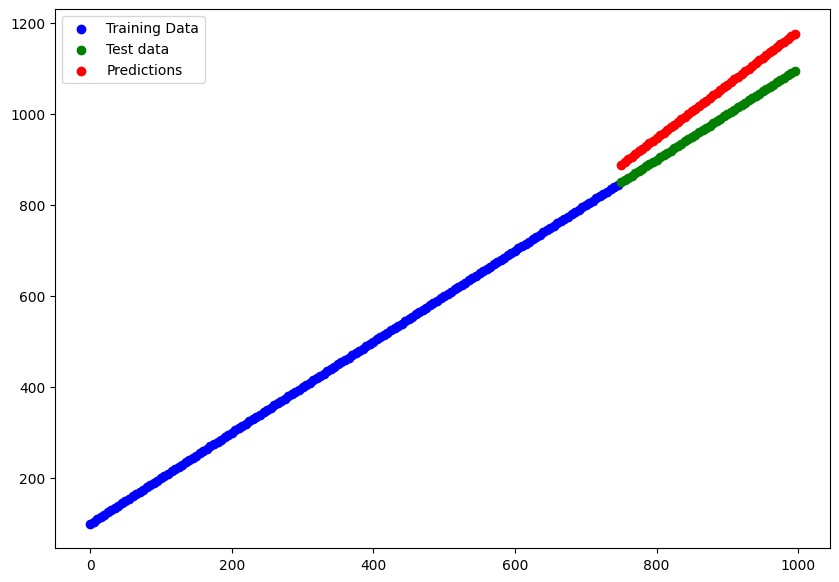

In [36]:
y_reg_preds = model_3.predict(X_reg_test)

plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training Data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend()

In [53]:
# The missing piece: non-linearity

tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="relu")
])

model_6.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])

history = model_6.fit(X, y, epochs=250, verbose=0)

313/313 [==============================] - 0s 625us/step
doing binary classification


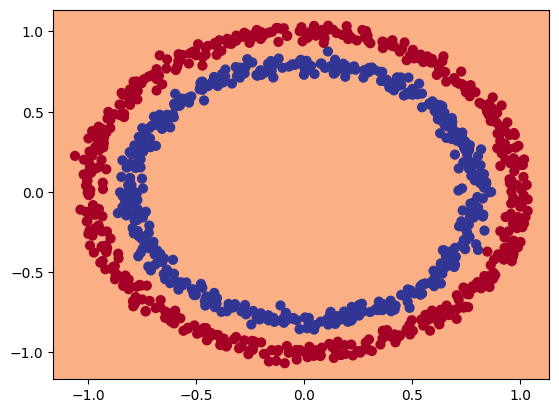

In [44]:
model_6.evaluate(X, y)

plot_decision_boundary(model_6, X, y)

In [52]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_7.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])

history = model_7.fit(X, y, epochs=250, verbose=0)

313/313 [==============================] - 0s 587us/step
doing binary classification


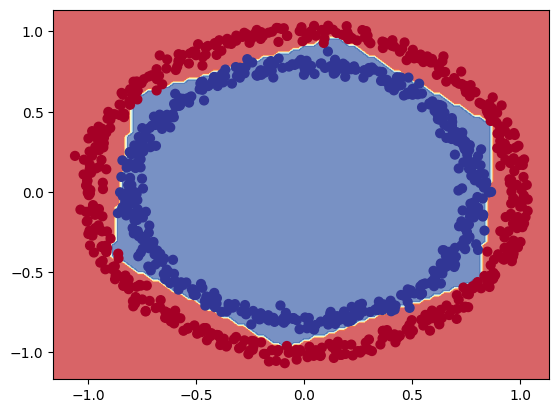

In [49]:
model_7.evaluate(X, y)
plot_decision_boundary(model_7, X, y)

In [57]:
len(X), len(y)

(1000, 1000)

313/313 [==============================] - 0s 561us/step
doing binary classification


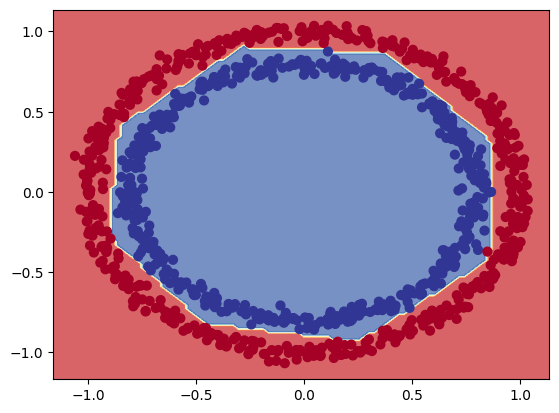

In [63]:
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_8.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
               metrics=["accuracy"])

history = model_8.fit(X_train, y_train, epochs=100, verbose=0)

model_8.evaluate(X_test, y_test)
plot_decision_boundary(model_8, X, y)

Text(0.5, 1.0, 'Model_8 loss curves')

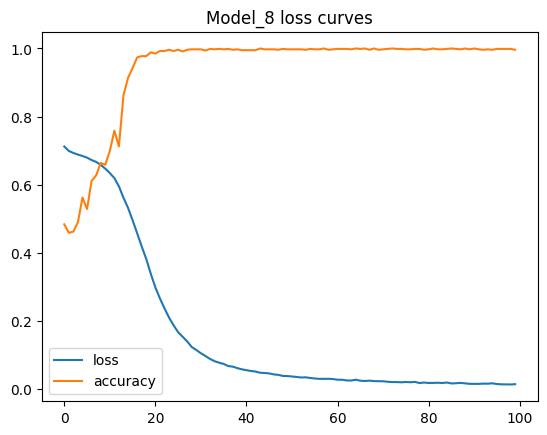

In [65]:
pd.DataFrame(history.history)

#Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")

In [67]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_9.compile(loss="binary_crossentropy",
               optimizer="Adam",
               metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 **(epoch/20))

history_9 = model_9.fit(X_train, y_train, epochs=100, verbose=0, callbacks=[lr_scheduler])

Text(0.5, 1.0, 'Model_8 loss curves')

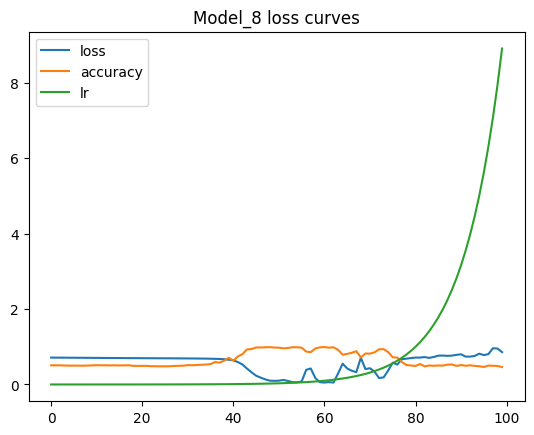

In [68]:
pd.DataFrame(history_9.history)

#Plot the loss curves
pd.DataFrame(history_9.history).plot()
plt.title("Model_8 loss curves")

Text(0.5, 1.0, 'Learning Rate vs. Loss')

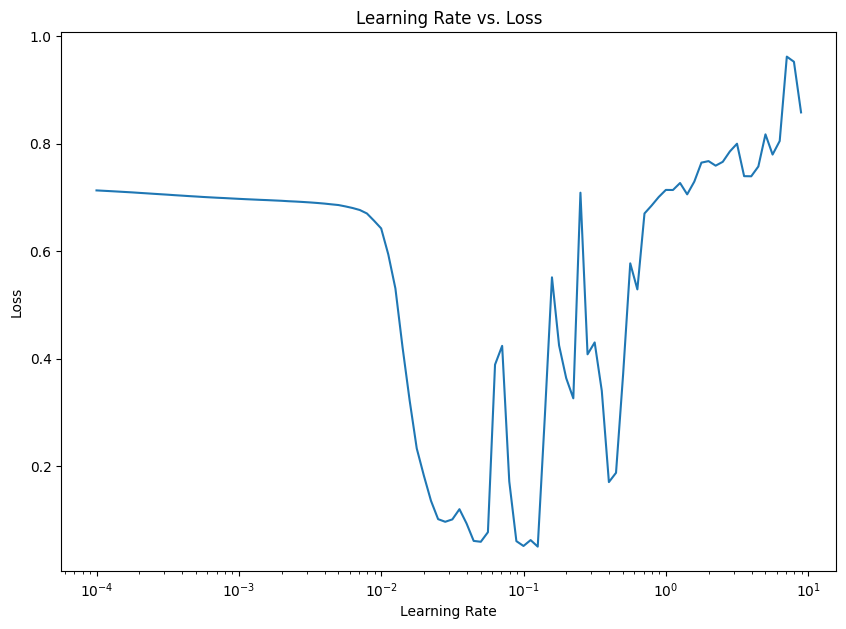

In [72]:
lrs = 1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs. Loss")

In [76]:
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [80]:
train_labels
len(train_labels)

60000